In [2]:
!uv pip install numpy pandas

import numpy as np
import pandas as pd

Audited 2 packages in 135ms


In [3]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()   #Shows first 5 rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.sample(5)    #Shows random 5 rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5388,ham,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!,NaN,NaN,NaN
618,ham,I come n pick Ì_ up... Come out immediately af...,NaN,NaN,NaN
3359,ham,Please attend the phone:),NaN,NaN,NaN
3325,ham,Huh so fast... Dat means u havent finished pai...,NaN,NaN,NaN
4551,ham,"\SYMPTOMS\"" when U are in love: \""1.U like lis...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deployment

## 1. Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [10]:
df.sample(5)

,v1,v2
1361,ham,Shuhui say change 2 suntec steamboat? U noe wh...
2881,ham,Hi Harish's rent has been transfred to ur Acnt.
1655,ham,At 7 we will go ok na.
4923,ham,We can go 4 e normal pilates after our intro...
4792,ham,Or u ask they all if next sat can a not. If al...


In [11]:
#Renaming columns
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
4099,ham,I not at home now lei...
5177,ham,Very strange. and are watching the 2nd one n...
3781,ham,How r Ì_ going to send it to me?
1789,ham,Takin a shower now but yeah I'll leave when I'...
4665,ham,Not..tel software name..


In [12]:
#Label Encoding ham to 0 and spam to 1.

!uv pip install scikit-learn

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Audited 1 package in 117ms


In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [15]:
#checking missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
#checking duplicated values
df.duplicated().sum()

np.int64(403)

In [17]:
#remove duplicated values
df = df.drop_duplicates(keep = 'first')

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(5169, 2)

## 2. EDA

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

Audited 1 package in 132ms


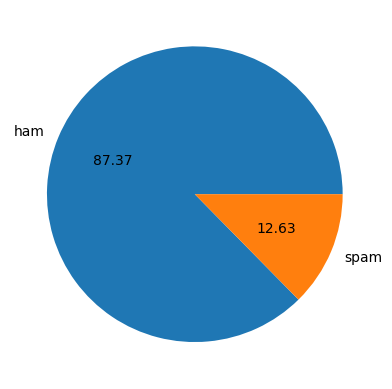

In [22]:
!uv pip install matplotlib

from matplotlib import pyplot as plt

plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [23]:
#Data is imbalanced. 

In [24]:
!uv pip install nltk
import nltk

Audited 1 package in 117ms


In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SamuelPC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)
df['num_characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 5169, dtype: int64

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
#Sentence tokenization

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_sentences']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: num_sentences, Length: 5169, dtype: int64

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [37]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
df[df['target'] == 0]

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [35]:
#for ham messages
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target'] == 1]

,target,text,num_characters,num_words,num_sentences
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1


In [39]:
#for spam messages
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [40]:
!uv pip install seaborn
import seaborn as sns

Resolved 15 packages in 1.06s
Prepared 1 package in 202ms
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 151ms
 + seaborn==0.13.2


<Axes: xlabel='num_characters', ylabel='Count'>

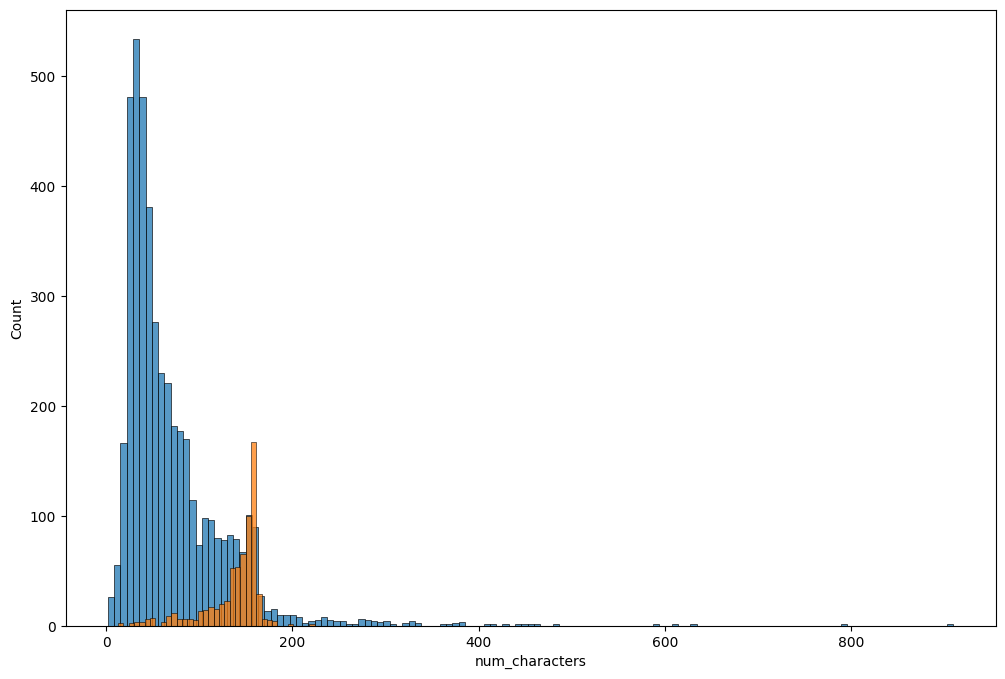

In [48]:
plt.figure(figsize=(12,8))

#histogram for ham messages
sns.histplot(df[df['target'] == 0]['num_characters'])

#histogram for spam messages
sns.histplot(df[df['target'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

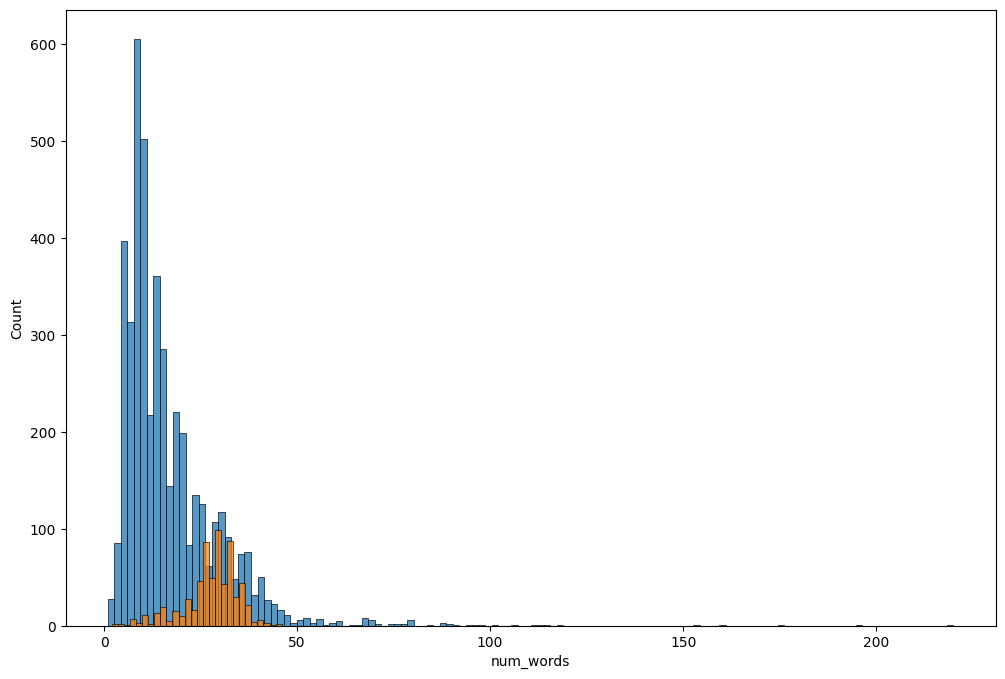

In [49]:
plt.figure(figsize=(12,8))

#histogram for ham messages
sns.histplot(df[df['target'] == 0]['num_words'])

#histogram for spam messages
sns.histplot(df[df['target'] == 1]['num_words'])

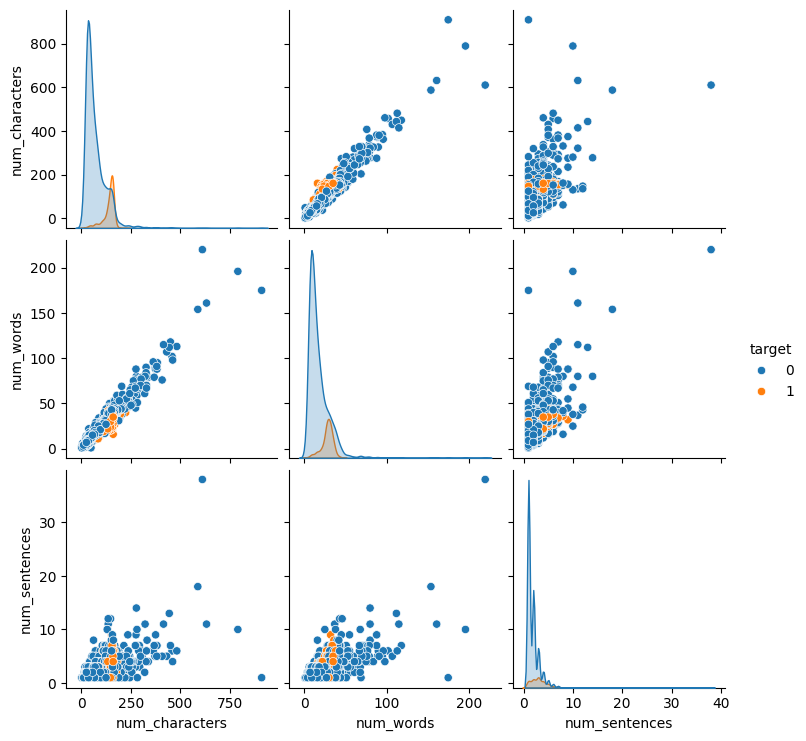

In [50]:
sns.pairplot(df,hue='target')

<Axes: >

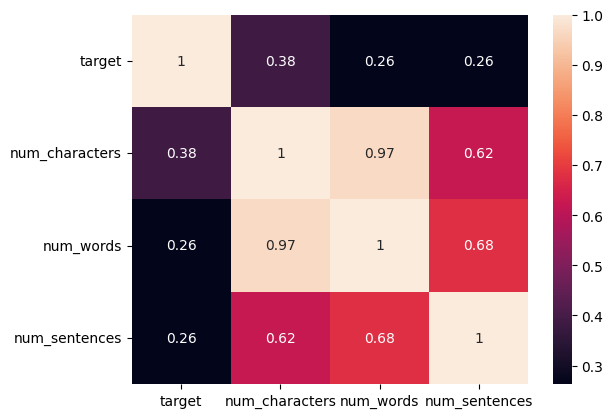

In [55]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot = True)

## 3. Data Preprocessing

- Lowercasing
- Tokenization
- Remove special characters
- Removing stop words and punctuation
- Stemming

In [70]:
from nltk.corpus import stopwords
stopwords.words('english')   #for removing stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [71]:
import string   #for removing punctuation

In [73]:
from nltk.stem.porter import PorterStemmer   #For stemming
ps = PorterStemmer()


ps.stem('dancing')

'danc'

In [77]:
def transform_text(text):
    text = text.lower()  #lowercasing
    text = nltk.word_tokenize(text)  #word tokenization
 
    y = []               #removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]  #y is cloned to text variable. variable cannot directly be assigned to a list.
    y.clear()    #clears y. Its again a new empty list

    for i in text:    #Removing stop words and punctuations
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:     #Stemming
        y.append(ps.stem(i))

    
    return " ".join(y)

In [80]:
transform_text("Hello my name is Ayush Khanal and I have 20% fat %% and dieting, running, exercising")

'hello name ayush khanal 20 fat diet run exercis'

In [81]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [82]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [83]:
df['transformed_text'] = df['text'].apply(transform_text)

In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [86]:
!uv pip install wordcloud

Resolved 12 packages in 791ms
Prepared 1 package in 195ms
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 36ms
 + wordcloud==1.9.4


In [91]:
from wordcloud import WordCloud    #for creating word cloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [92]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

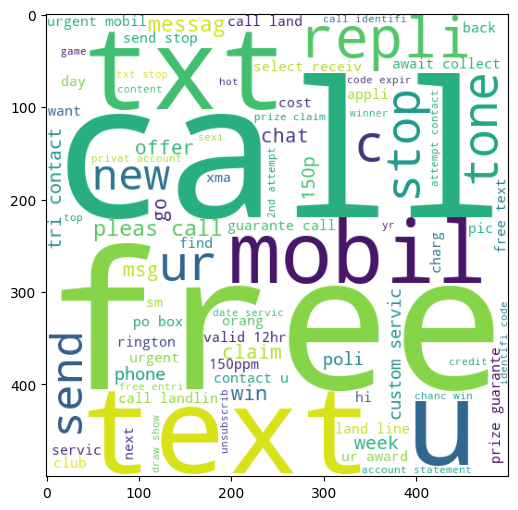

In [94]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)    #Spam wordcloud

In [95]:
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

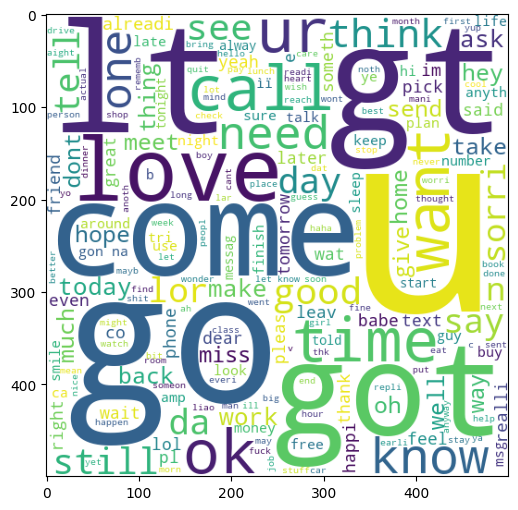

In [96]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)      #ham wordcloud

In [97]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
